# Setup

In [1]:
import torch

from utils.generate_input_from__directory import generate_input_from_input_directory
from utils.generate_input_from_tensors import generate_input_from_tensors
from utils.predict_layout import predict_layout
from utils.generate_output_based_on_layout_dm import generate_output_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json
#from utils.print_attrs import print_attrs

/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/maciejkozubal/mi

# Compare input generation methods

## 1. generate from tensors (user passed of default)


In [3]:
custom_input_from_tensor_default = generate_input_from_tensors(verbatim=True)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



In [4]:
custom_input_from_tensor = generate_input_from_tensors(
    bboxes_tensor = torch.FloatTensor([
        [0.5, 0.5, 0.1, 0.6],
        [0.5, 0.5, 0.6, 0.1],
        [0.5, 0.5, 0.2, 0.2],
        [0.5, 0.5, 0.4, 0.4],
        [0.8, 0.8, 0.1, 0.1],
        [0.2, 0.2, 0.1, 0.1]
    ]),
    labels_tensor = torch.LongTensor([0, 1, 6, 4, 0, 0]),
    verbatim=True
)

bboxes:
tensor([[0.5000, 0.5000, 0.1000, 0.6000],
        [0.5000, 0.5000, 0.6000, 0.1000],
        [0.5000, 0.5000, 0.2000, 0.2000],
        [0.5000, 0.5000, 0.4000, 0.4000],
        [0.8000, 0.8000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.1000, 0.1000]])
labels: tensor([0, 1, 6, 4, 0, 0])



## 2. generate based on files from input directory

In [5]:
custom_input_from_data_directory, list_files, canvas_dimensions = generate_input_from__directory(verbatim=True)


test_background.png
	bbox:	tensor([0.5000, 0.5000, 1.0000, 1.0000])
	label:	'Background Image' (layoutdm_rico[6])

test_product.png
	bbox:	tensor([0.5000, 0.5000, 0.2880, 0.4498])
	label:	'Image' (layoutdm_rico[1])

test_logo.png
	bbox:	tensor([0.5000, 0.5000, 0.8000, 0.9970])
	label:	'Image' (layoutdm_rico[1])

test_header.header
	bbox:	tensor([0.5000, 0.5000, 0.5630, 0.0690])
	label:	'Text' (layoutdm_rico[0])

test2.txt
	bbox:	tensor([0.5000, 0.5000, 0.6210, 0.0405])
	label:	'Text' (layoutdm_rico[0])

test1.txt
	bbox:	tensor([0.5000, 0.5000, 0.7410, 0.0300])
	label:	'Text' (layoutdm_rico[0])


# Comaparison of models 

## 1. Trained on Rico dataset (default)
`model_name = layoutdm_publaynet`

### 1.1. Condition type 'c'
C -> S+P (reposition and resize)

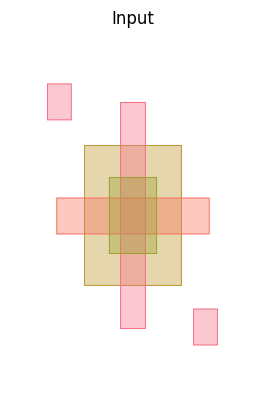

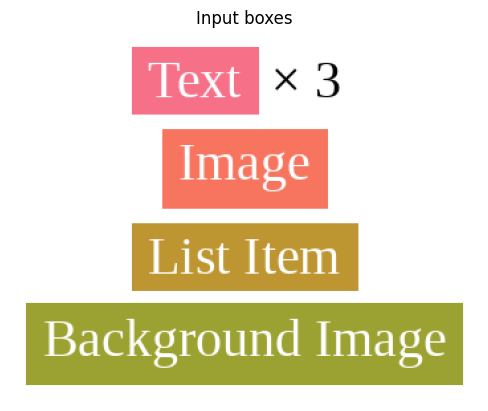

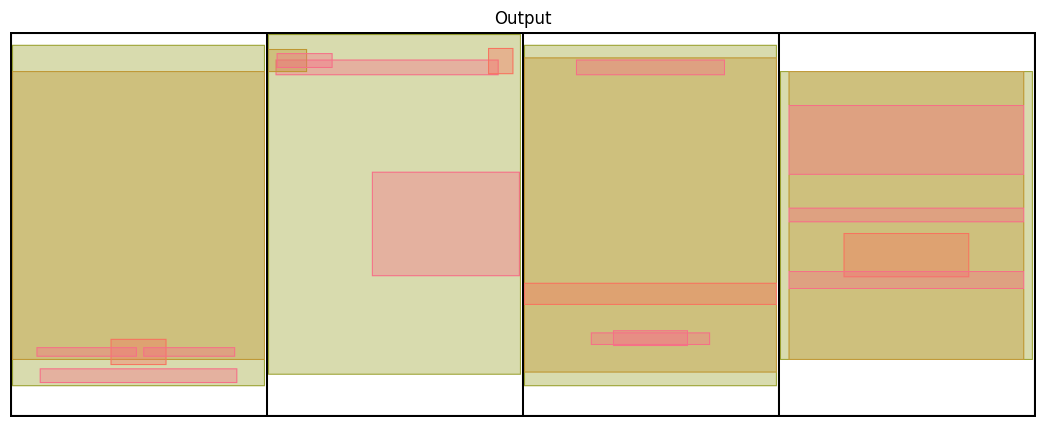

{'colors': [(246, 112, 136), (247, 116, 95), (232, 129, 49), (208, 142, 49), (190, 150, 49), (173, 156, 49), (155, 162, 49), (134, 167, 49), (99, 174, 49), (49, 178, 82), (51, 176, 122), (52, 174, 142), (53, 173, 157), (54, 172, 170), (54, 170, 182), (56, 168, 197), (57, 166, 216), (73, 160, 244), (135, 149, 244), (172, 136, 244), (204, 121, 244), (237, 97, 244), (245, 98, 217), (245, 104, 191), (246, 108, 166)], 'names': ['Text', 'Image', 'Icon', 'Text Button', 'List Item', 'Input', 'Background Image', 'Card', 'Web View', 'Radio Button', 'Drawer', 'Checkbox', 'Advertisement', 'Modal', 'Pager Indicator', 'Slider', 'On/Off Switch', 'Button Bar', 'Toolbar', 'Number Stepper', 'Multi-Tab', 'Date Picker', 'Map View', 'Video', 'Bottom Navigation'], 'canvas_size': (360, 240), 'use_grid': True}


In [7]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='c', plot_images=True, verbatim=True)

### 1.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

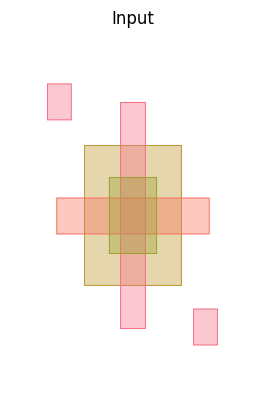

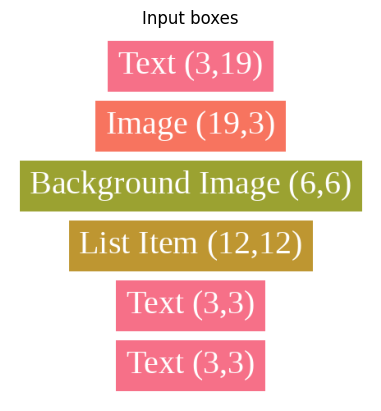

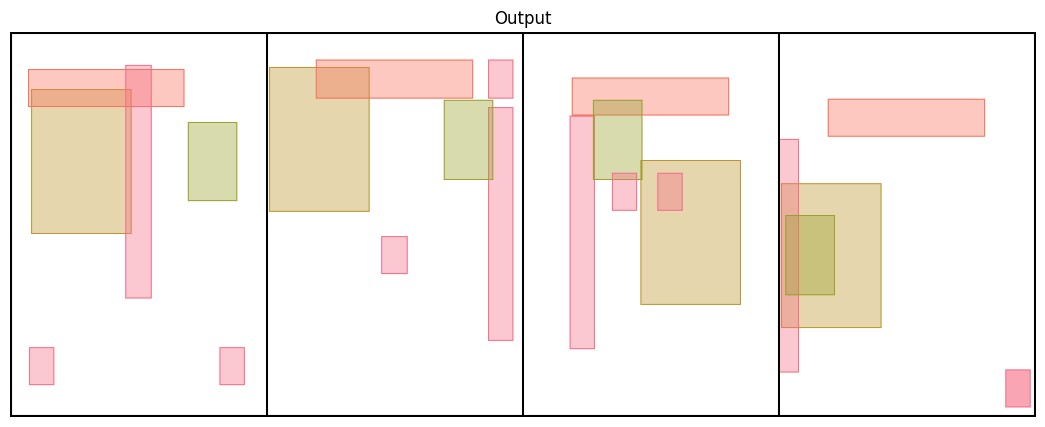

{'colors': [(246, 112, 136), (247, 116, 95), (232, 129, 49), (208, 142, 49), (190, 150, 49), (173, 156, 49), (155, 162, 49), (134, 167, 49), (99, 174, 49), (49, 178, 82), (51, 176, 122), (52, 174, 142), (53, 173, 157), (54, 172, 170), (54, 170, 182), (56, 168, 197), (57, 166, 216), (73, 160, 244), (135, 149, 244), (172, 136, 244), (204, 121, 244), (237, 97, 244), (245, 98, 217), (245, 104, 191), (246, 108, 166)], 'names': ['Text', 'Image', 'Icon', 'Text Button', 'List Item', 'Input', 'Background Image', 'Card', 'Web View', 'Radio Button', 'Drawer', 'Checkbox', 'Advertisement', 'Modal', 'Pager Indicator', 'Slider', 'On/Off Switch', 'Button Bar', 'Toolbar', 'Number Stepper', 'Multi-Tab', 'Date Picker', 'Map View', 'Video', 'Bottom Navigation'], 'canvas_size': (360, 240), 'use_grid': True}


In [8]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='cwh', plot_images=True, verbatim=True)

## 2. Trained on PubLayNet dataset
`model_name = layoutdm_publaynet`

### 2.1. Condition type 'c'
C -> S+P (reposition and resize)

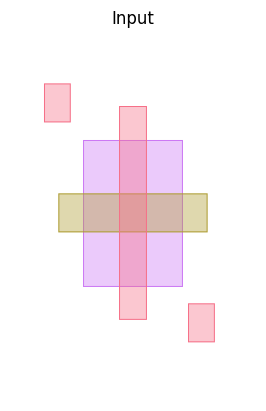

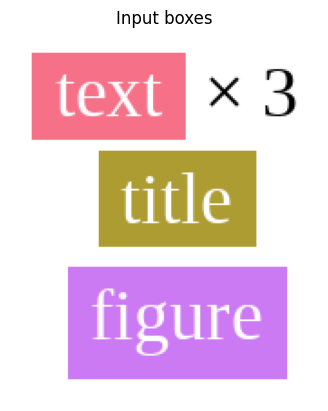

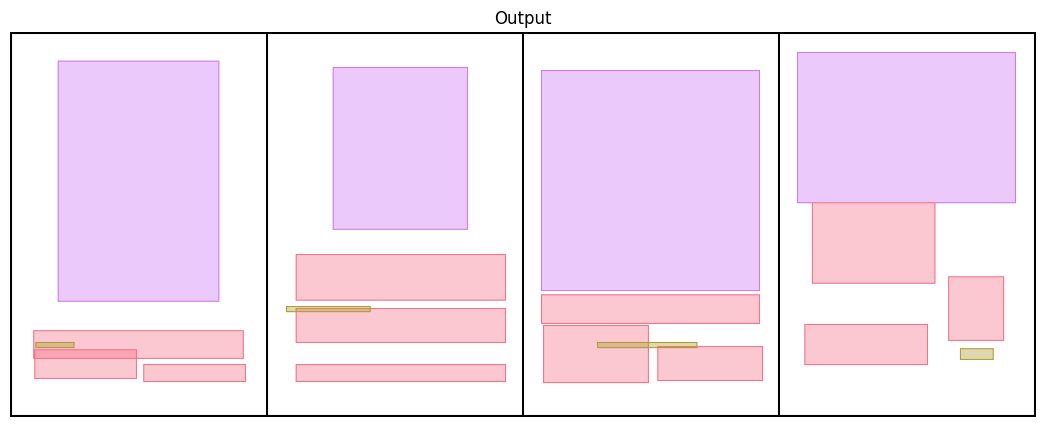

In [11]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='c', verbatim=True)

### 2.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

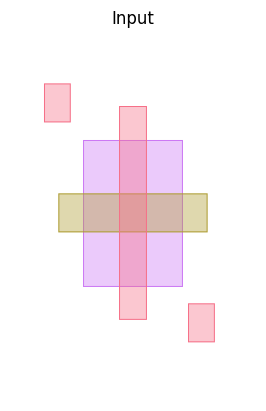

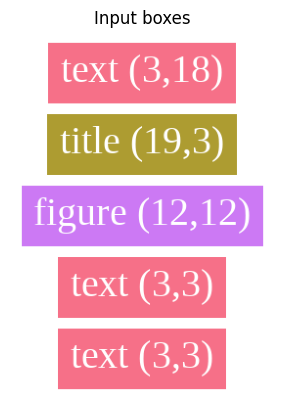

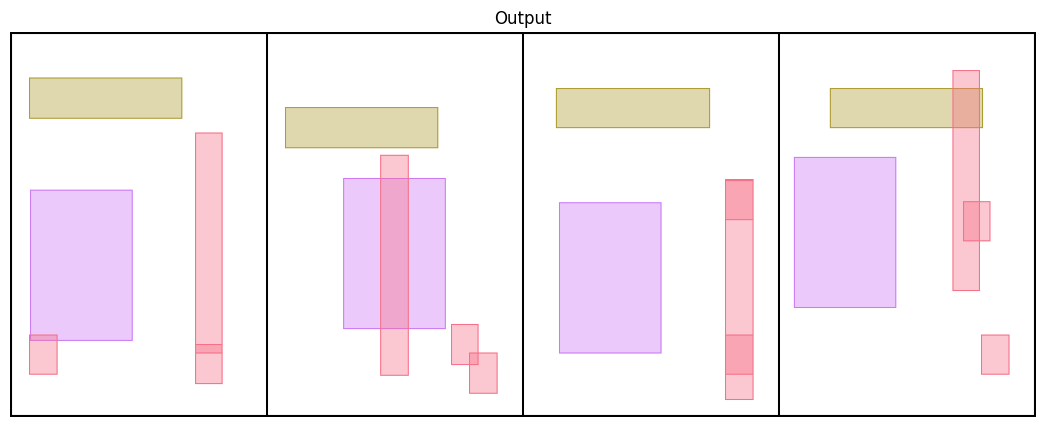

In [8]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='cwh', verbatim=True)

# Recommened approach

Recommendations:
- model:            Rico
- condition typ:    cwh ("C+S -> P": reposition without resizing)
    
Optional:
- canvas_size - from the output of the generate_input_from_directory() function
- W_CANVAS
- n_samples (default: 4)

1. Input
    - Put input objects in the `input/`` subdirectories:
        - header files (in `input/headers`)
        - schema: `*.header`
        - images (in `input/images/`)
        - schema: `*_background.png`, `*_product.png`, or `*_logo.png`
        - text files (in `input/texts`)
        - schema: `*.txt`
    - `custom_input, list_files, canvas_dimensions = generate_input_from_directory()`

2. Predict layout
    - generate input tensors from objects in data/
    - `pred, predicted_layout_json = predict_layout(custom_input, list_files, canvas_dimensions = canvas_dimensions)`
    - the predicted layouts from layoutdm in a json format (predicted_layouts.json)

3. Combine images
    - for visualization purpose
    - combine the input elements into the output png file, based on the layoutdm predicted layouts (predicted_layouts.json)
    - `combine_images_based_on_layout_dm(verbatim=verbatim)`


# tests

/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/torch_geometric/typing.py:31: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/maciejkozubal/miniconda3/envs/loreal_poc/lib/python3.7/site-packages/torch_geometric/typing.py:42: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
/home/maciejkozubal/mi


 ####################  Input generated based on objects in input/ subdirectories  ####################

test_background.png
	bbox:	tensor([0.5000, 0.5000, 1.0000, 1.0000])
	label:	'Background Image' (layoutdm_rico[6])

test_product.png
	bbox:	tensor([0.5000, 0.5000, 0.4000, 0.4993])
	label:	'Image' (layoutdm_rico[1])

test_logo.png
	bbox:	tensor([0.5000, 0.5000, 0.1500, 0.2339])
	label:	'Image' (layoutdm_rico[1])

test_header.header
	bbox:	tensor([0.5000, 0.5000, 0.5630, 0.0885])
	label:	'Text' (layoutdm_rico[0])

test2.txt
	bbox:	tensor([0.5000, 0.5000, 0.0720, 0.3778])
	label:	'Text' (layoutdm_rico[0])

test1.txt
	bbox:	tensor([0.5000, 0.5000, 0.7410, 0.0390])
	label:	'Text' (layoutdm_rico[0])

 ####################  Input visualization, elements and their dimensions ####################


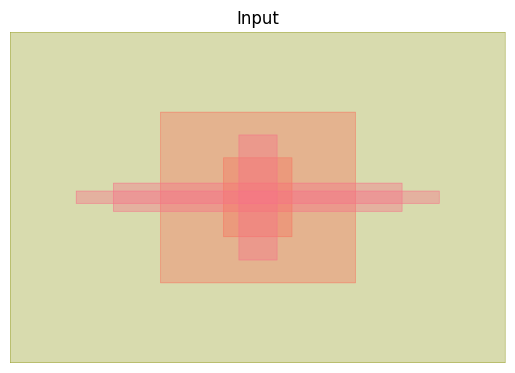


 ####################  Input visualization, labels  ####################


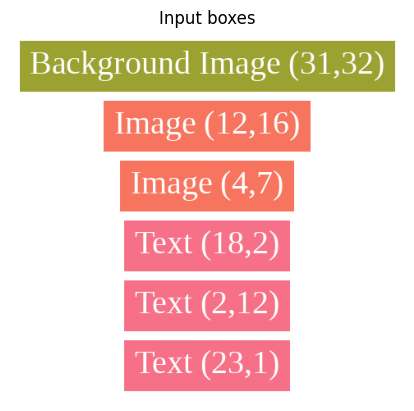


 ####################  Output visualization  ####################


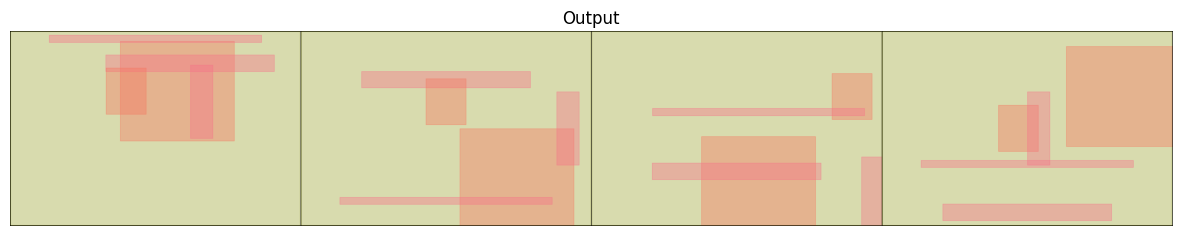

####################  Predicted layouts  ####################

Page 0:
test_background.png:	(0.5001364946365356, 0.5002066493034363, 0.9995776414871216, 1.0)
test_product.png:	(0.5756483674049377, 0.3077288269996643, 0.3931393027305603, 0.5162917375564575)
test_logo.png:	(0.3992178738117218, 0.3077288269996643, 0.1378743052482605, 0.237772136926651)
test_header.header:	(0.6193783283233643, 0.16399148106575012, 0.582085907459259, 0.08528786897659302)
test2.txt:	(0.6594333052635193, 0.36240601539611816, 0.07718715071678162, 0.3783089220523834)
test1.txt:	(0.5001364946365356, 0.037348806858062744, 0.732058584690094, 0.037206873297691345)

Page 1:
test_background.png:	(0.5001364946365356, 0.5002066493034363, 0.9995776414871216, 1.0)
test_product.png:	(0.7447949647903442, 0.7604250907897949, 0.3931393027305603, 0.5162917375564575)
test_logo.png:	(0.5001364946365356, 0.36240601539611816, 0.1378743052482605, 0.237772136926651)
test_header.header:	(0.5001364946365356, 0.24859368801116943, 0.58

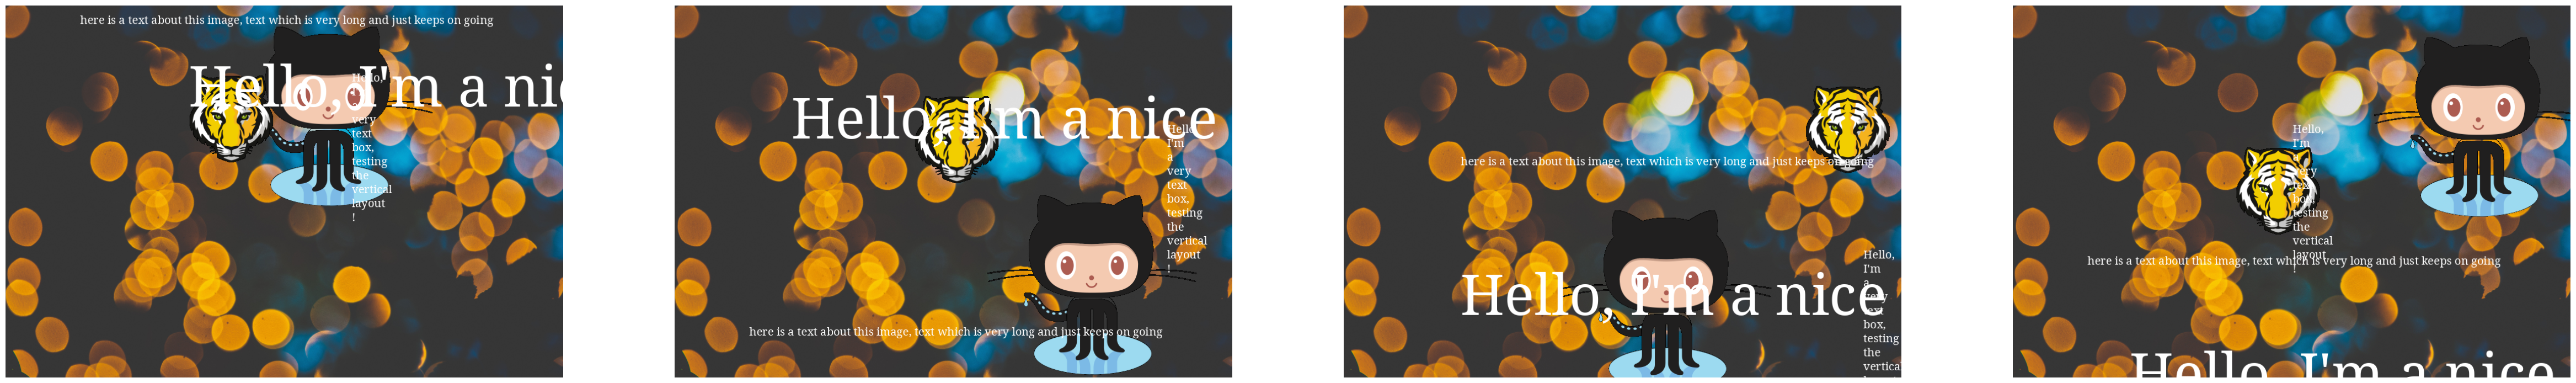

In [1]:
from utils.generate_input_from_directory import generate_input_from_directory
from utils.predict_layout import predict_layout
from utils.combine_images_based_on_layout_dm import combine_images_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json

verbatim = True

custom_input, list_files, canvas_dimensions = generate_input_from_directory(verbatim=verbatim)

pred, predicted_layout_json = predict_layout(custom_input,
                      list_files,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      canvas_dimensions = canvas_dimensions,
                      verbatim=True,
                      n_samples=4,
                      )

combine_images_based_on_layout_dm(verbatim=verbatim)